In [173]:
import pandas as pd
import numpy as np
import seaborn as sns

In [174]:
df = pd.read_csv('players_all.csv')
df

,team,name,age,senior_career,youth_career
0,Czech Republic,Ales Mandous,29,2012–2015,1998–2002
1,Czech Republic,Jiri Pavlenka,29,2012–2016,NaN
2,Czech Republic,Tomas Vaclik,32,2007–2010,2006–2007
3,Czech Republic,Jan Boril,30,2009–2016,NaN
4,Czech Republic,Jakub Brabec,28,2008–2011,–2008
...,...,...,...,...,...
142,Ukraine,Viktor Tsygankov,23,2016–,2009–2010
143,Ukraine,Oleksandr Zubkov,24,2014–2020,2009–2011
144,Ukraine,Artem Besedin,25,2015–,NaN
145,Ukraine,Artem Dovbyk,24,2014–2015,2010–2014


In [175]:
def find_start_year(x):
    if not type(x) == float:
        # return np.nan()
#     if x.startswith('–'):
#         return x.replace('–', '')
#     else:
        return x.split('–')[0]
    

In [176]:
df['senior_career_start'] = df['senior_career'].apply(find_start_year)

In [177]:
df['youth_career_start'] = df['youth_career'].apply(find_start_year)

In [178]:
df

,team,name,age,senior_career,youth_career,senior_career_start,youth_career_start
0,Czech Republic,Ales Mandous,29,2012–2015,1998–2002,2012,1998
1,Czech Republic,Jiri Pavlenka,29,2012–2016,NaN,2012,None
2,Czech Republic,Tomas Vaclik,32,2007–2010,2006–2007,2007,2006
3,Czech Republic,Jan Boril,30,2009–2016,NaN,2009,None
4,Czech Republic,Jakub Brabec,28,2008–2011,–2008,2008,
...,...,...,...,...,...,...,...
142,Ukraine,Viktor Tsygankov,23,2016–,2009–2010,2016,2009
143,Ukraine,Oleksandr Zubkov,24,2014–2020,2009–2011,2014,2009
144,Ukraine,Artem Besedin,25,2015–,NaN,2015,None
145,Ukraine,Artem Dovbyk,24,2014–2015,2010–2014,2014,2010


In [179]:
df['senior_career_start'] = df['senior_career_start'].astype(int)
# df['youth_career_start'] = df['youth_career_start'].astype(int)

In [180]:
def find_age_started_senior(row):
    if row['senior_career_start']:
        return row['age'] - (2021 - row['senior_career_start'])

def find_age_started_youth(row):
    if row['youth_career_start']:
        return row['age'] - (2021 - int(row['youth_career_start']))

In [181]:
df['age_started_senior_career'] = df.apply(find_age_started_senior, axis=1)

In [182]:
df['age_started_youth_career'] = df.apply(find_age_started_youth, axis=1)

In [183]:
df

,team,name,age,senior_career,youth_career,senior_career_start,youth_career_start,age_started_senior_career,age_started_youth_career
0,Czech Republic,Ales Mandous,29,2012–2015,1998–2002,2012,1998,20,6.0
1,Czech Republic,Jiri Pavlenka,29,2012–2016,NaN,2012,None,20,NaN
2,Czech Republic,Tomas Vaclik,32,2007–2010,2006–2007,2007,2006,18,17.0
3,Czech Republic,Jan Boril,30,2009–2016,NaN,2009,None,18,NaN
4,Czech Republic,Jakub Brabec,28,2008–2011,–2008,2008,,15,NaN
...,...,...,...,...,...,...,...,...,...
142,Ukraine,Viktor Tsygankov,23,2016–,2009–2010,2016,2009,18,11.0
143,Ukraine,Oleksandr Zubkov,24,2014–2020,2009–2011,2014,2009,17,12.0
144,Ukraine,Artem Besedin,25,2015–,NaN,2015,None,19,NaN
145,Ukraine,Artem Dovbyk,24,2014–2015,2010–2014,2014,2010,17,13.0


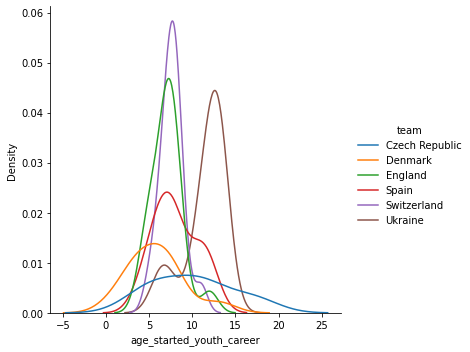

In [184]:
sns.displot(data=df.loc[df['age_started_youth_career']>0],
            x="age_started_youth_career", hue="team", kind="kde")

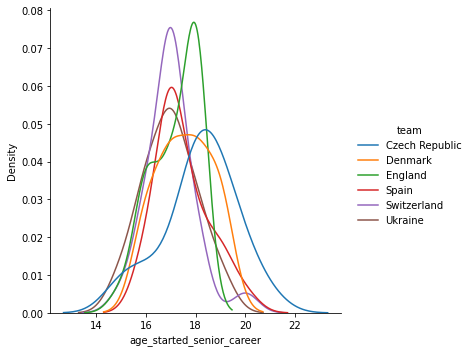

In [185]:
sns.displot(data=df, x="age_started_senior_career", hue="team", kind="kde")

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_started_senior_career', ylabel='count'>

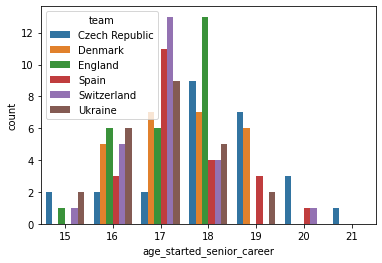

In [186]:
sns.countplot('age_started_senior_career', hue='team', data=df)